<a href="https://colab.research.google.com/github/AMiller113/Machine_Learning/blob/master/Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow-gpu
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

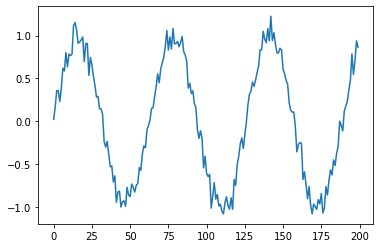

In [0]:
# Synthentic Data Creation
series = np.sin(.1*np.arange(200)) + np.random.randn(200)*0.1 # Second Part adds noise to the sine wave

plt.plot(series)
plt.show()

In [0]:
# Setting up the data for time series prediction
T = 10 # Amount of values used to predict the next value
X = [] # Holds the inputs
Y = [] # Holds the targets
for t in range((len(series))- T): # The length of N is equal to the total length of the data set minus the length of the time sequence
  x = series[t:t+T] # Holds a set of T values
  X.append(x) # Appends the set of T values to list X
  y = series[t+T] # Holds the target of the set of T values
  Y.append(y) # appends the target to list Y

X = np.array(X).reshape(-1, T) # Makes list X an array and sets the size to (N X T)
Y = np.array(Y) # Makes Y an array, no reshaping necessary as the lenth of Y is already equal to X
N = len(X) # Sets N to the length of array X
print('X.shape =', X.shape, ', Y.shape =',Y.shape)

In [0]:
i = Input(shape=(T,)) # (*, T) so it can take any N
x = Dense(1)(i) # Regression doesent use activation functions
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)

r = model.fit(
    X[:-N//2], Y[:-N//2], # Train on the first half of the data
    epochs=125,
    validation_data=(X[-N//2:], Y[-N//2:]) # Validate on the second half of the data, as we are trying to be able to predict future data points in the data. So validating randomly would be less meaningful
    )

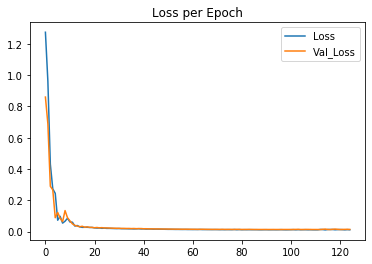

In [0]:
plt.plot(r.history['loss'], Label= 'Loss')
plt.plot(r.history['val_loss'], Label= 'Val_Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.show()

In [0]:
# Forecast future values using only self predictions for making future predictions,(Not using the true targets)
validation_targets = Y[-N//2:]
validation_predictions = []

# Last Training input, begins where the validation set starts
last_x = X[-N//2]

while len(validation_predictions) < len(validation_targets):
  p = model.predict(last_x.reshape(1,-1))[0,0] # Model.predct returns N=Samples by K=Output Nodes output in this case it returns a matrix [1,1] so the first position [0,0] must be indexed to get the value

# Update Predictions List
  validation_predictions.append(p)

# Make the New Input
  last_x = np.roll(last_x, -1) # np.roll shifts the array. Negative values shift to the left, positive values shift to the right
  last_x[-1] = p

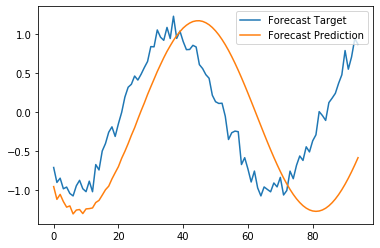

In [0]:
plt.plot(validation_targets, label ='Forecast Target')
plt.plot(validation_predictions, label='Forecast Prediction')
plt.legend()
plt.show()